In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [166]:
import pandas as pd
#import Airbnb Listing Data
datafile = "/content/drive/MyDrive/Machine Learning/new_orleans_airbnb_listings.csv"
data = pd.read_csv(datafile)

In [187]:
from inspect import cleandoc
#Data preprocessing

selected_data = data[['host_response_time','host_is_superhost','host_identity_verified','neighbourhood_cleansed','property_type','room_type','accommodates','bedrooms','beds','minimum_nights','maximum_nights','number_of_reviews','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','instant_bookable','reviews_per_month','price']]
clean_data = selected_data.dropna()
feature_cols = ['host_response_time','host_is_superhost','host_identity_verified','neighbourhood_cleansed','property_type','room_type','accommodates','bedrooms','beds','minimum_nights','maximum_nights','number_of_reviews','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','instant_bookable','reviews_per_month']
#Clean the 'price' column
index = 0
for i in clean_data['price']:
    #Remove the dollar sign
    if "$" in i:
      i = i.replace("$", "")
    #Remove commas
    if "," in i:
      i = i.replace(",", "")
    #Replace the old price with the new cleaned price
    clean_data.iloc[index:index+1,21] = i
    index = index+1

#Cast 'price' from a string to a float
clean_data['price'] = clean_data['price'].astype(float)

#Create dummy variables for categorical data
clean_data = pd.get_dummies(clean_data)

X = clean_data.loc[ : , clean_data.columns != 'price']
y = clean_data.loc[ : , clean_data.columns == 'price']


<ipython-input-187-c8bab5d9d204>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['price'] = clean_data['price'].astype(float)


<Axes: >

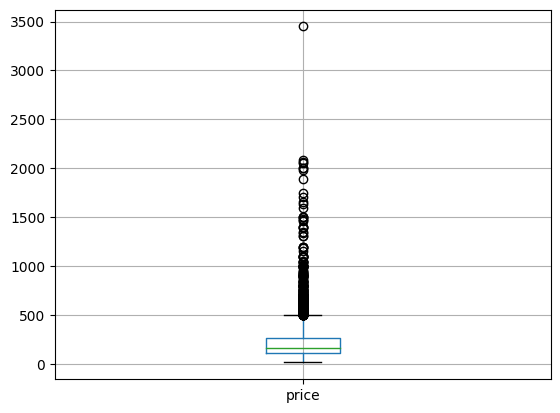

In [205]:
y.boxplot(column='price')

array([[<Axes: title={'center': 'bedrooms'}>]], dtype=object)

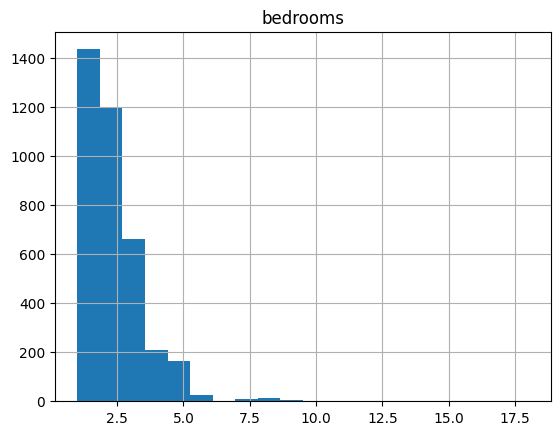

In [207]:
X.hist(bins = 20, column='bedrooms')

array([[<Axes: title={'center': 'reviews_per_month'}>]], dtype=object)

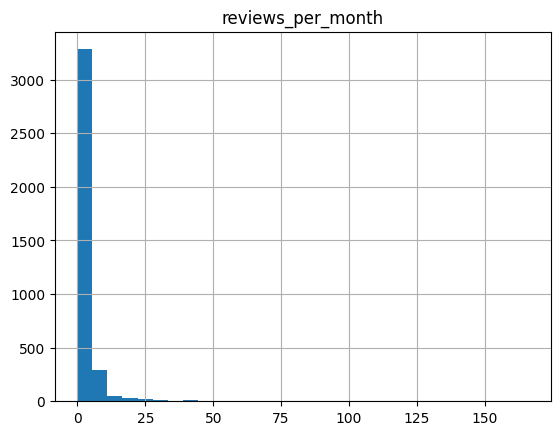

In [206]:
X.hist(bins=30,column='reviews_per_month')

In [209]:
# Simple linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
import numpy as np

#Choosing 'bedrooms' as the feature for simple linear regression
single_feature_X = X[['bedrooms']]
simple_linear_regressor = LinearRegression(fit_intercept =True)

#Root Mean Square Error using cross-validation
MSE_score = cross_val_score(simple_linear_regressor, single_feature_X, y, cv=10, scoring='neg_mean_squared_error')
RMSE_score = np.mean(np.sqrt(-MSE_score))
print(RMSE_score)

[-32889.36485394 -14212.41535144 -17437.23267264 -23193.93523591
 -18466.66420717 -31233.24609764 -17571.73398442 -15486.6544738
 -35049.66636844 -19708.81224852]
148.21446041041688


In [169]:
# Multiple linear regression
linear_regressor = LinearRegression(fit_intercept =True)

#Root Mean Square Error using cross-validation
MSE_score = cross_val_score(linear_regressor, X, y, cv=10, scoring='neg_mean_squared_error')
RMSE_score = np.mean(np.sqrt(-MSE_score))
print(RMSE_score)

137.47691858731167


Text(0, 0.5, 'RMSE (lower is better)')

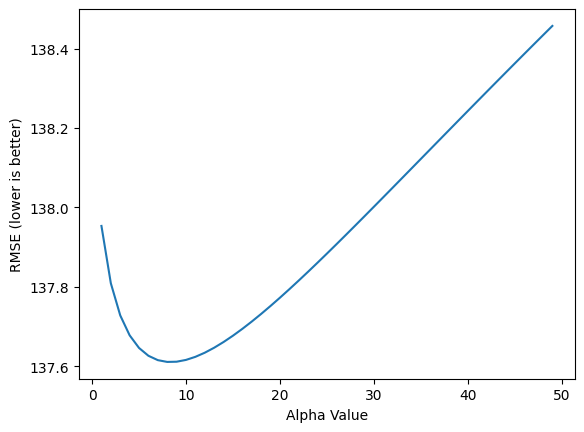

In [170]:
#Loop through values of alpha to determine a suitible value for Ridge regression
alpha_range = range(1,50)
RMSE_scores = []
for alpha in alpha_range:
  ridge_regressor = Ridge(alpha = alpha)
  MSE_scores = cross_val_score(ridge_regressor, X, y, cv=5, scoring='neg_mean_squared_error')
  RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))
# plot n_estimators (x-axis) versus RMSE (y-axis)
plt.plot(alpha_range, RMSE_scores)
plt.xlabel('Alpha Value')
plt.ylabel('RMSE (lower is better)')

In [171]:
# Ridge regression
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, Ridge
ridge_regressor = Ridge(alpha = 10)

#Root Mean Square Error using cross-validation
MSE_score = cross_val_score(ridge_regressor, X, y, cv=10, scoring='neg_mean_squared_error')
RMSE_score = np.mean(np.sqrt(-MSE_score))
print(RMSE_score)

136.06027940006635


Text(0, 0.5, 'RMSE (lower is better)')

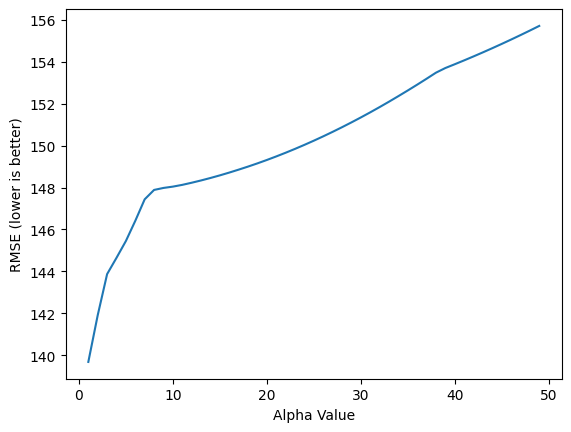

In [172]:
#Loop through values of alpha to determine a suitible value for Lasso regression
alpha_range = range(1,50)
RMSE_scores = []
for alpha in alpha_range:
  lasso_regressor = Lasso(alpha = alpha)
  MSE_scores = cross_val_score(lasso_regressor, X, y, cv=5, scoring='neg_mean_squared_error')
  RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))
# plot n_estimators (x-axis) versus RMSE (y-axis)
plt.plot(alpha_range, RMSE_scores)
plt.xlabel('Alpha Value')
plt.ylabel('RMSE (lower is better)')

In [173]:
# Lasso regression
from sklearn.linear_model import Lasso, Ridge
lasso_regressor = Lasso(alpha = 1)
# lasso_regressor.fit(X_train, y_train)

#predictions
# y_predict = lasso_regressor.predict( X_test)

#Root Mean Square Error using cross-validation
MSE_score = cross_val_score(lasso_regressor, X, y, cv=10, scoring='neg_mean_squared_error')
RMSE_score = np.mean(np.sqrt(-MSE_score))
print(RMSE_score)

138.24706829191376


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

Text(0, 0.5, 'RMSE (lower is better)')

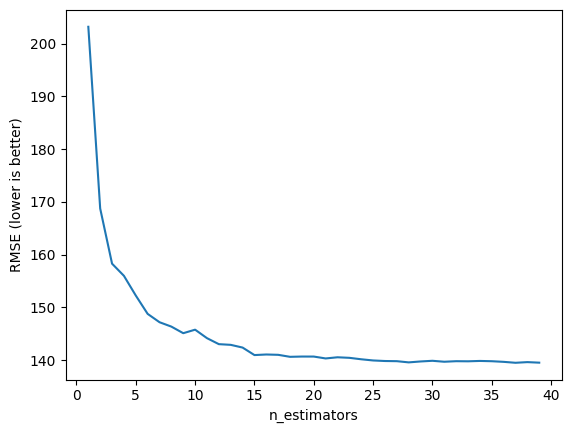

In [177]:
#Loop through values for n-estimators to determine a suitible value for random forest regression

import matplotlib.pyplot as plt
#This took about 5 minutes to run. The RMSE converged around 20-30 estimators so I chose 30 as the value for n-estimators.

estimator_range = range(1,40)
RMSE_scores = []
for estimator in estimator_range:
  rfreg = RandomForestRegressor(n_estimators=estimator, random_state=1)
  MSE_scores = cross_val_score(rfreg, X, y, cv=5, scoring='neg_mean_squared_error')
  RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))
# plot n_estimators (x-axis) versus RMSE (y-axis)
plt.plot(estimator_range, RMSE_scores)
plt.xlabel('n_estimators')
plt.ylabel('RMSE (lower is better)')

In [214]:
# Random Forest regression
#Test train split for other regression techniques
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

random_forrest_regressor = RandomForestRegressor(n_estimators=30)
random_forrest_regressor.fit(X_train, y_train)
#predictions
y_predict = random_forrest_regressor.predict(X_test)

#Root Mean Square Error using cross-validation
MSE_score = cross_val_score(random_forrest_regressor, X, y, cv=10, scoring='neg_mean_squared_error')
RMSE_score = np.mean(np.sqrt(-MSE_score))
print(RMSE_score)

<ipython-input-214-8c4eff3f1bcf>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forrest_regressor.fit(X_train, y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the sh

140.00393124156614


In [215]:
from matplotlib import pyplot

#Check the feature importance generated by the random forest regressor
importance = random_forrest_regressor.feature_importances_
#Look at features with importance above 5%
indicies = np.where(importance>=0.05)
importance = pd.DataFrame(np.take(importance,indicies).tolist())

#Create a dataframe with the most important features and their level of importance
df = pd.DataFrame(X.columns[indicies])
df.insert(1, 'importance', importance.iloc[0])
df.columns = ['Features','Importance']
print(df)




            Features  Importance
0       accommodates    0.077190
1           bedrooms    0.443255
2               beds    0.059331
3  reviews_per_month    0.051281
